## Iffat Chowdhury
## MTH 337 
## Instructor - Richard Hollister

# Project 6 Computing with Text

## Introduction 

When it comes to writings some words are used more often than others. The word that comes to mind when it comes to thinking about what word appears most often in writing would be "the". I am expecting that the word "the" will be one of the words that come up most often in the four text files that we will be analyzing. Additionally, I would think that pronouns would also be used more often than other types of words. Pronouns like "he", "she", and "him" are often used when it comes to writing someone or something, instead of using names of people or places pronouns are usually used in place of them, which is why I think they will be some of the top words to appear.

Although, many common words are often used it also comes down to what type of text is being analyzed. There are various forms of text where you would not expect words like "the" and pronouns to come up often. Text that includes mostly names of people or places would not have as many pronouns used compared to a position paper or any form of academic writing.

Analyzing how often words appear in various forms of text will show trends in how people write across the board. By ranking, the frequencies of how often words are being used will demonstrate trends that exist when it comes to word choice in different types of text.

In [62]:
import matplotlib.pyplot as plt
import collections as co        # (1) learned from: https://docs.python.org/2/library/collections.html

I used a website (https://docs.python.org/2/library/collections.html) to understand how the library collections worked and how it can be used in this project. I specifically used Counter from the collections library and by putting a list into the parentheses of the following $collections.Counter(list)$ will create a dictionary that will include ratios of each word and how often it appears in the list. This library seemed to be useful because it cuts down on how long it takes the code to execute. 

In [63]:
def count1(filename):
    f = open(filename)
    list1 = []
    for line in f:
        line_strip = line.strip('\n, ., ?, !')     # removed '.', '?', '!', and the \n that appears at the end of lines
        line_strip = line_strip.replace(',', '')   # removed ',' that are within the text file
        line_strip = line_strip.lower()            # made every letter lower case
        a = line_strip.split()                     # a represents a list containing all words in a line
        list1.append(a)
    f.close                         # closed the file because no more information from it will be read after this point
    list2 = []
    for i in list1:
        for j in i:
            list2.append(j)         # list of every word in the file
    count = co.Counter(list2)       # each word will be connected to the number of times it shows up in a dictionary entry
    list4 = []
    for i in count:
        list4.append((i,count[i]))
    return list4                    # a list containing tuples with the word and how often it occurs, there are no repeats 
        

When a text file is being read within Python various things need to be accounted for when using it in your code. For instance, "ball" and "Ball" are seen as different words by python because one letter is capital in the second case and not in the first case. Likewise, "ball", "ball,", "ball?" and many others are not considered to be the same word. I created the function $count1(filename)$, reads a file, and writes each specific word into a list. When the file is being read it removes '.', '?', '!' and ',', so that punctuation does not impact the frequency that is being determined from each word. "\n" is also being removed, when a file is being read in python there is "\n" at the end of every line. I also made all the letters in the file to be lower case letters so that words would be counted as being the same even if one letter is capital in one word while another is not.

After a list of all the words that are within a file are obtained and the file is closed, the next part of the code uses Counter from the library collections, it is used to create a dictionary that will include ratios of each word and how often it appears in the list. It also removes repeats within the dictionary.

For the project, we were asked to create a list of the top twenty words and not a dictionary of them, so I changed the dictionary to a list of all the entries as a set of tuples. Each tuple had two entries in them, which were each word and the second entry was a number representing how often the word appears. 

The result is a list of all the words that were included in the file and how often each one showed up, no word was represented more than once and the list was in the order that each new word appeared in the file.

In [64]:
def sort_by_count(list2):
    list2.sort(key=lambda i:i[1])  # sorting by how often a word appears  
    list2.reverse()                # sorting to most to least 
    return list2
    

It may help to see the words and how often they are used in the order that they appear, but it would also be useful to see which words appear the most and which appear the least. So the function $sort$_$by$_$count(list2)$ takes a list of tuples and orders the list by how high the second entry is, which represents how often a word appears.

In [65]:
def top_words(filename):  
    list2_reverse = sort_by_count(count1(filename)) # a list that is sorted from most to least appearing words
    list1 = []
    for i in list2_reverse:
        if len(list1) < 20: 
            list1.append(i)
    return list1              # returns a list of the first twenty in the list

Part one of the project asks to create a list of the top twenty words that appear in a specific file, so far the first two functions created in this projects account for all the words used in the file. The function $top$_$words(filename)$ will take a list that is sorted from most to least appearing words and will return a list of the first twenty tuples in the inputted list.

In [66]:
def plot_graph(filename): 
    list_of_tup = top_words(filename) # previous functions get the list of top twenty word
    grid = plt.figure()
    inputs = []
    outputs = []
    count = -1
    for i in list_of_tup:
        count = count + 1
        if count < 20:
            inputs.append(i[0])      # appending words
            outputs.append(i[1])     # appending number related to the specific word
    axes = grid.add_axes([1,1,1,1])
    axes.bar(inputs, outputs)        # bar graph
    plt.title('List of Top Twenty Words in The Text File ' + str(filename))
    plt.xlabel('Words')
    plt.ylabel('Number of Times "Word" Was Used')
    plt.show()
    
        

Getting a visual representation of the information gathered through the use of these functions will help to identify possible trends when it comes to what words are often used. The function $plot$_$graph(filename)$ will create a bar graph representing the first twenty most occurring words in the file. I was thinking about doing more but because of the limitted space of the graph it becomes too messy and hard to understand so I stopped at the first twenty. Each of the previous functions builds on top of one another and are all in the function $plot$_$graph(filename)$ in one way or another.

## Part 1

**around_world.txt- J.Verne, Around the World in Eighty Days**

In [67]:
count1('around_world.txt')

[('around', 30),
 ('the', 4672),
 ('world', 51),
 ('in', 1036),
 ('eighty', 24),
 ('days', 58),
 ('contents', 1),
 ('chapter', 38),
 ('i', 213),
 ('which', 508),
 ('phileas', 250),
 ('fogg', 536),
 ('and', 1852),
 ('passepartout', 369),
 ('accept', 3),
 ('each', 38),
 ('other', 57),
 ('one', 146),
 ('as', 431),
 ('master', 88),
 ('man', 61),
 ('ii', 2),
 ('is', 299),
 ('convinced', 7),
 ('that', 490),
 ('he', 957),
 ('has', 49),
 ('at', 632),
 ('last', 61),
 ('found', 65),
 ('his', 855),
 ('ideal', 2),
 ('iii', 2),
 ('a', 1293),
 ('conversation', 12),
 ('takes', 6),
 ('place', 37),
 ('seems', 10),
 ('likely', 10),
 ('to', 1657),
 ('cost', 11),
 ('dear', 5),
 ('iv', 2),
 ('astounds', 2),
 ('servant', 41),
 ('v', 2),
 ('new', 50),
 ('species', 2),
 ('of', 1804),
 ('funds', 3),
 ('unknown', 3),
 ('moneyed', 2),
 ('men', 20),
 ('appears', 2),
 ('on', 509),
 ("'change", 6),
 ('vi', 2),
 ('fix', 205),
 ('detective', 58),
 ('betrays', 2),
 ('very', 71),
 ('natural', 9),
 ('impatience', 8),
 (

In [68]:
len(count1('around_world.txt'))

9591

The text file **around_world.txt** has 9591 different words some of these words appear just once while others show up multiple times. The second word to appear in the file was "the" and it also showed up the most throughout the file. Likewise, words like "in" and "which" were within the first twenty words to appear and are also within the list of the top twenty words to be used. There may be a correlation between how often a word appears and if it appears earlier in the file.

In [69]:
top_words('around_world.txt')

[('the', 4672),
 ('and', 1852),
 ('of', 1804),
 ('to', 1657),
 ('a', 1293),
 ('in', 1036),
 ('was', 999),
 ('he', 957),
 ('his', 855),
 ('at', 632),
 ('fogg', 536),
 ('with', 516),
 ('had', 512),
 ('on', 509),
 ('which', 508),
 ('not', 503),
 ('it', 500),
 ('that', 490),
 ('as', 431),
 ('for', 403)]

On the list of most occurring words, there are shorter words compared to longer ones, the longest words that showed up in the top twenty list is the five-letter word "which", it is the only ive letter word to be in the list.

- One Letter Words -> 1
- Two Letter Words -> 8
- Three Letter Words -> 7
- Four Letter Words  -> 3
- Five Letter Words -> 1


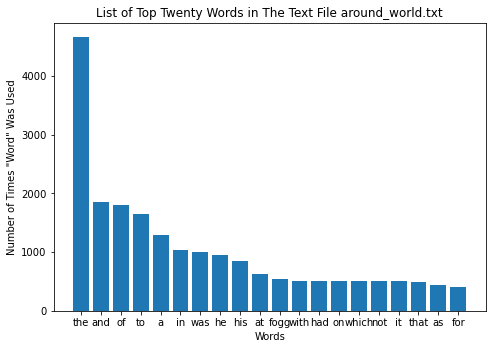

In [70]:
plot_graph('around_world.txt')

The top word being used was "the" and there is a big gap between how often it came up compared to "and" which is the second most common word to appear in the file. There was more than double the amount of appearance of "the" compared to that of the number of "and" that showed up in the text. Other than this large gap there are not as big gaps between how often the other words show up in the file.

**republic.txt - Plato, The Republic**

In [71]:
count1('republic.txt')

[('the', 7041),
 ('republic', 1),
 ('persons', 47),
 ('of', 4654),
 ('dialogue', 3),
 ('socrates', 55),
 ('who', 642),
 ('is', 2486),
 ('narrator', 1),
 ('glaucon', 58),
 ('adeimantus', 35),
 ('polemarchus', 22),
 ('cephalus', 9),
 ('thrasymachus', 46),
 ('cleitophon', 5),
 ('and', 5726),
 ('others', 95),
 ('are', 1271),
 ('mute', 1),
 ('auditors', 1),
 ('scene', 1),
 ('laid', 13),
 ('in', 2139),
 ('house', 19),
 ('at', 482),
 ('piraeus;', 1),
 ('whole', 76),
 ('narrated', 2),
 ('by', 640),
 ('day', 29),
 ('after', 88),
 ('it', 173),
 ('actually', 5),
 ('took', 13),
 ('place', 67),
 ('to', 3280),
 ('timaeus', 2),
 ('hermocrates', 1),
 ('critias', 1),
 ('a', 2007),
 ('nameless', 2),
 ('person', 43),
 ('introduced', 5),
 ('book', 10),
 ('i', 1560),
 ('went', 10),
 ('down', 38),
 ('yesterday', 1),
 ('piraeus', 2),
 ('with', 552),
 ('son', 46),
 ('ariston', 3),
 ('that', 1908),
 ('might', 76),
 ('offer', 13),
 ('up', 107),
 ('my', 183),
 ('prayers', 3),
 ('goddess', 4),
 ('(bendis', 1),
 (

In [72]:
len(count1('republic.txt'))

9726

The text file **republic.txt** has 9726 different types of words that are being used throughout the file. Words like "the", "of" and "is" are some words that are appearing very early on in the text file and is also one of the top words that are used throughout the file. Since these words are used more there is a higher probability that they will appear early on in the file.

In [73]:
top_words('republic.txt')

[('the', 7041),
 ('and', 5726),
 ('of', 4654),
 ('to', 3280),
 ('is', 2486),
 ('in', 2139),
 ('he', 2066),
 ('a', 2007),
 ('that', 1908),
 ('be', 1830),
 ('i', 1560),
 ('not', 1425),
 ('which', 1334),
 ('are', 1271),
 ('you', 1155),
 ('or', 1141),
 ('they', 1141),
 ('will', 1119),
 ('as', 910),
 ('said', 895)]

Strangely, again the only one five-letter word appeared on the list of top words, but it is the same word, which is "which". Makes me wonder if "which" is the most commonly used five letter word because this holds true in **republic.txt** and **around_world.txt**.

- One Letter Words -> 2
- Two Letter Words -> 8
- Three Letter Words -> 5
- Four Letter Words  -> 4
- Five Letter Words -> 1

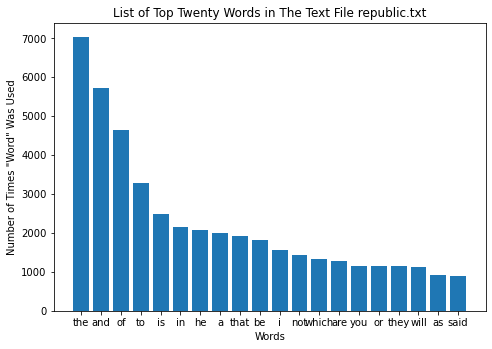

In [74]:
plot_graph('republic.txt')

The downward trend of how often a word appears has large gaps between the first five most used words. After that, the appearance of the following words is reduced by a smaller amount. The word that is the twentieth most common word to appear is "said" and it appeared 895 times which is over 6000 words less than the most used word "the".

**little.txt - L.M. Alcott, Little Women**

In [75]:
count1('little.txt')

[('little', 716),
 ('women', 38),
 ('by', 533),
 ('louisa', 1),
 ('may', 136),
 ('alcott', 1),
 ('contents', 2),
 ('part', 48),
 ('1', 1),
 ('one', 661),
 ('playing', 15),
 ('pilgrims', 8),
 ('two', 132),
 ('a', 4402),
 ('merry', 21),
 ('christmas', 36),
 ('three', 71),
 ('the', 7450),
 ('laurence', 85),
 ('boy', 97),
 ('four', 49),
 ('burdens', 8),
 ('five', 12),
 ('being', 142),
 ('neighborly', 4),
 ('six', 20),
 ('beth', 364),
 ('finds', 7),
 ('palace', 6),
 ('beautiful', 49),
 ('seven', 7),
 ("amy's", 80),
 ('valley', 9),
 ('of', 3373),
 ('humiliation', 2),
 ('eight', 5),
 ('jo', 1138),
 ('meets', 2),
 ('apollyon', 4),
 ('nine', 12),
 ('meg', 594),
 ('goes', 30),
 ('to', 5039),
 ('vanity', 9),
 ('fair', 42),
 ('ten', 12),
 ('p.c.', 2),
 ('and', 7994),
 ('p.o', 2),
 ('eleven', 5),
 ('experiments', 4),
 ('twelve', 13),
 ('camp', 9),
 ('thirteen', 3),
 ('castles', 5),
 ('in', 2419),
 ('air', 106),
 ('fourteen', 3),
 ('secrets', 7),
 ('fifteen', 9),
 ('telegram', 6),
 ('sixteen', 5),
 

In [76]:
len(count1('little.txt'))

15766

The file **little.txt** has 15766 different words, which is much more than either **republic.txt** and **around_world.txt** text files. **republic.txt** and **around_world.txt** have less than 10000 words but more than 9000. This was also the first time that "the" was not one of the first five words to be used in the text file even though it is the second most used word.

In [77]:
top_words('little.txt')

[('and', 7994),
 ('the', 7450),
 ('to', 5039),
 ('a', 4402),
 ('of', 3373),
 ('her', 3141),
 ('i', 2676),
 ('in', 2419),
 ('she', 2248),
 ('for', 2181),
 ('it', 2044),
 ('was', 2022),
 ('as', 1957),
 ('you', 1849),
 ('with', 1797),
 ('that', 1744),
 ('he', 1468),
 ('but', 1434),
 ('jo', 1138),
 ('his', 1115)]

The most commonly used word in this file was "and" and not "the". This file also did not have any words that had more than four letters when it comes to the top twenty words that are used in the text file.

- One Letter Words -> 2
- Two Letter Words -> 7
- Three Letter Words -> 9
- Four Letter Words  -> 2

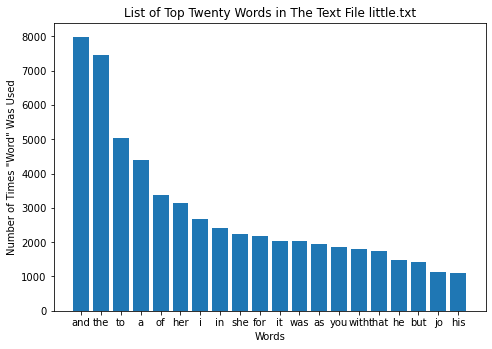

In [78]:
plot_graph('little.txt')

The outliers of the data points above would be that "and" and "the" appear much more than the third most used word. "to" is the third most appearing word and it shows up 5039 times, while "and" and  "the" appear more than 7000 times. There is also a notable gap between how often the fourth and fifth words appear ("a" and "of").

**gulliver.txt - J.Swift, Gulliver’s Travels into Several Remote Regions of the World**

In [79]:
count1('gulliver.txt')

[("gulliver's", 2),
 ('travels', 11),
 ('into', 124),
 ('several', 85),
 ('remote', 4),
 ('regions', 2),
 ('of', 1779),
 ('the', 2905),
 ('world', 19),
 ('by', 371),
 ('jonathan', 1),
 ('swift', 1),
 ('d.d', 1),
 ('edited', 1),
 ('with', 432),
 ('introduction', 1),
 ('and', 1775),
 ('notes', 5),
 ('thomas', 3),
 ('m.', 2),
 ('balliet', 2),
 ('superintendent', 1),
 ('schools', 2),
 ('springfield', 1),
 ('mass', 1),
 ('thirty-eight', 1),
 ('illustrations', 3),
 ('a', 1166),
 ('map', 4),
 ('part', 44),
 ('i', 1431),
 ('voyage', 19),
 ('to', 1575),
 ('lilliput', 18),
 ('ii', 7),
 ('brobdingnag', 5),
 ('[illustration:', 26),
 ('"he', 4),
 ('commanded', 18),
 ('his', 486),
 ('generals', 3),
 ('draw', 14),
 ('up', 130),
 ('troops."', 1),
 ('p.', 26),
 ('42.]', 2),
 ('d.c.', 1),
 ('heath', 1),
 ('&', 1),
 ('co.', 1),
 ('publishers', 1),
 ('boston', 1),
 ('new', 6),
 ('york', 1),
 ('chicago', 1),
 ('1900', 1),
 ('preface', 2),
 ('lo!', 1),
 ('book', 10),
 ('from', 201),
 ('all', 171),
 ('its', 

In [80]:
len(count1('gulliver.txt'))

6636

The text file **gulliver.txt** has 6636 different words like "the", "of", "by" are some of the first words to appear in the text file while also being some of the most used words in the file.

In [81]:
top_words('gulliver.txt')

[('the', 2905),
 ('of', 1779),
 ('and', 1775),
 ('to', 1575),
 ('i', 1431),
 ('a', 1166),
 ('in', 961),
 ('my', 842),
 ('was', 653),
 ('that', 569),
 ('as', 487),
 ('his', 486),
 ('me', 479),
 ('with', 432),
 ('for', 415),
 ('which', 413),
 ('it', 389),
 ('by', 371),
 ('had', 353),
 ('he', 353)]

Like two of the other text files "the" is mostly used in the file. Once again the only five-letter word that is in the list of top twenty words of a specific text file is "which". This makes a good case for the most used five letter word.

- One Letter Words -> 2
- Two Letter Words -> 9
- Three Letter Words -> 6
- Four Letter Words  -> 2
- Five Letter Words -> 1

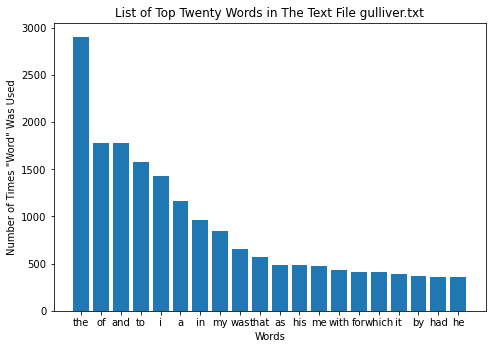

In [82]:
plot_graph('gulliver.txt')

Once again the word "the" is the most commonly used word and it is used much more compared to the second most used word, which in this case it would be "of". The rest of the top twenty words decrease in occurrence by a small number. In this file "he" is the last of the top twenty numbers to appear which I did not expect.

## Part 2

The text files **around_world.txt**, **republic.txt**, **little.txt**, and **gulliver.txt** were all used in this project to determine trends that existed between each of them and to determine what stood out.

When considering all the words that made it on to the list of top twenty words from each of these files, there was a total of **36 different words** included across these four list each of whom have been shown in this project already. The words "the", "and", "of", "to", "a", "in", "he", "that", and "as" appeared in all four text files. The words "was", "his", "with", "which", "it", "for", and "i" appeared in three text files. The words "had", "not", and "you" appeared in two text files. The words "at", "fogg", "on", "is", "be", "are", "or", "they", "will", "said", "her", "she", "but", "jo", "my", "me", and "by" appear in only one text file. 

- 9 words that appeared in all four text files
- 7 words that appeared in three text files
- 3 words that appeared in two text files
- 17 words that appear in only one text file


- One Letter Words -> 2
- Two Letter Words -> 15
- Three Letter Words -> 12
- Four Letter Words  -> 6
- Five Letter Words  -> 1


The most common word used in the four texts was overall "the", in three of the four files it was the most common word used and it was the second most common in the file that it wasn't. Second place would be "and", it was the only word to show up more than "the" in only one case and is usually the second most common word in each file. The third most common word to show up across the three txt files is "of". The top three positions of each of the list for the four files were either "the", "and", "of", and "to".

Out of the 36 different words compiled by the top twenty words of each of the files, the largest most common word would be "which", it showed up in three out of the four top words list for the files. The word "which" was also the only five-letter word to end up on any of the lists. The most common four-letter word would be "that" would appear in the list of the top words for four files. The second place would be "with" that made it onto three of the lists.

The most common words to be included in the files are two-letter words and three-letter words, while big words (words over five letters) were less likely to be written.

Of the 36 words most of the words were common and it would not be surprising if you told someone that they were some of the most often used words in text files. However, there are two outliers, which would be "fogg" and "jo", both of these words made onto the list even though they are not words that people would often use when writing. For example, while I have written this report I used the vast majority of the words included in the list (when I say this I am not counting words that are written in quotations), words like "fogg" and "jo" don't get used as often. Both "fogg" and "jo" are only made onto the list of top words for only a single text file, so they mostly have some relevance to the topic of the article, "jo" is a relevant name in the file **little.txt** and "fogg" was related to the topic of the text file **around_world.txt**.

## Conclusion

The project demonstrated how certain words are used more often than others. The most common word used hands down by a large margin was the word "the". As shown and stated in the introduction this was by no means a surprise. Most people including myself use the word "the" several times when writing, A perfect example of this would be to look through the words that I have used in this project (excluding quoted words) and it would not be too surprising to find that the word "the" is most commonly used, at the very least it would be the second most used word.

The most common five-letter word will have to be "which" since it is the only five-letter word that made it onto any of the top word lists.

The four lists of top words from each of the files contain many similar words, especially when considering the top five words used in each of the files because their positions in each of the lists are very similar. 

The 36 different words that made up the four list of top words from each of the files were for the most part easy word that was common and this was not surprising when most people think about what words they use often in their writings they would most likely state words that have made it onto one of the four lists. Words like "the", "and", "of", "to", "a", "in", "he", "that", and "as" appeared in all four text files, they are all easy words that can be used in most sentences. The top three positions of each of the list for the four files was "the", "and", "of", and "to", which is not surprising because these words can be easily implemented in any sentence, it is rare to find a paper that does not use these words.

## Bibliography

1. Article Link: https://docs.python.org/2/library/collections.html
No author given.

I used this website to understand the library collections and from that library, I specifically used Counter from it which gives the number of times each entry is found in the list.

## Extra Credit 

In [83]:
import requests

In [84]:
r=requests.get('http://www.gutenberg.org/cache/epub/10921/pg10921.txt')
r.encoding = 'utf-8'

In [85]:
book=r.text

In [86]:
h=book.find('The World\'s Greatest Books')
k=book.find('End of the Project Gutenberg EBook of The World\'s Greatest Books')
book = book[h:k]

In [87]:
f=open('book.txt','w')
f.write(book)
f.close()

Text file Link
http://www.gutenberg.org/cache/epub/10921/pg10921.txt

I named the text file gotten from this link as **book.txt**.

###### **book.txt** - The World's Greatest Books — Volume 04 — Fiction by Hammerton and Mee

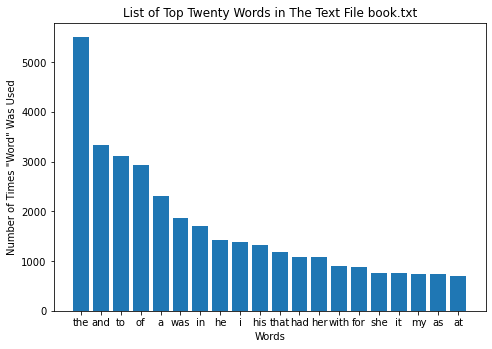

In [88]:
plot_graph('book.txt')

Once again the most common word is "the" and it is followed by "and". The word "the" is the most common word with a huge difference between it and the second most common word, which is held for most of the files used in the report.

In [89]:
top_words('book.txt')

[('the', 5520),
 ('and', 3345),
 ('to', 3124),
 ('of', 2940),
 ('a', 2319),
 ('was', 1859),
 ('in', 1707),
 ('he', 1424),
 ('i', 1376),
 ('his', 1333),
 ('that', 1183),
 ('had', 1089),
 ('her', 1083),
 ('with', 894),
 ('for', 883),
 ('she', 763),
 ('it', 762),
 ('my', 741),
 ('as', 737),
 ('at', 699)]

I randomly choose a book text file and the outcomes are very similar to what I got in the text files from the project. Every single word gotten of the top twenty most common words for this file was included in either all of the project files (project files are **around_world.txt**, **republic.txt**, **little.txt**, and **gulliver.txt**), or in at least one of them. All the words on the list are commonly used words and not difficult words, in this case, nothing standout as being out of place when thinking about commonly used words.